<a href="https://colab.research.google.com/github/Near-o7/desafio1_dataScience/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

❗️ El Informe se encuentra al final del Notebook

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [ ]:
tienda[["Precio", "Costo de envío"]].agg(["count", "mean", "sum", "min", "max"])

In [ ]:
tienda2[["Precio", "Costo de envío"]].agg(["count", "mean", "sum", "min", "max"])

,Precio,Costo de envío
count,"2,359.00","2,359.00"
mean,"473,227.43","25,216.24"
sum,"1,116,343,500.00","59,485,100.00"
min,"7,600.00",0.00
max,"2,953,400.00","162,500.00"


In [ ]:
tienda3[["Precio", "Costo de envío"]].agg(["count", "mean", "sum", "min", "max"])

,Precio,Costo de envío
count,"2,359.00","2,359.00"
mean,"465,459.77","24,805.68"
sum,"1,098,019,600.00","58,516,600.00"
min,"7,600.00",0.00
max,"2,968,200.00","158,400.00"


In [ ]:
tienda4[["Precio", "Costo de envío"]].agg(["count", "mean", "sum", "min", "max"])

,Precio,Costo de envío
count,"2,358.00","2,358.00"
mean,"440,362.89","23,459.46"
sum,"1,038,375,700.00","55,317,400.00"
min,"7,600.00",0.00
max,"2,902,200.00","154,700.00"


En primera instancia podemos observar algunos indicadores:
---
**Ranking por total de ventas**
1.   Tienda1 1,150,880,400
2.   Tienda2 1,116,343,500
3.   Tienda3 1,098,019,600.00
4.   Tienda4 1,038,375,700.00
---
**Ranking por precio promedio de ventas**

1.   Tienda1 487,867
2.   Tienda2 473,227
3.   Tienda3 465,459
4.   Tienda4 440,362




In [8]:
def ventas_por_año(df, nombre_tienda):
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], dayfirst=True)
    return df['Fecha de Compra'].dt.year.value_counts().sort_index().rename(nombre_tienda)

ventas_t1 = ventas_por_año(tienda, 'Tienda 1')
ventas_t2 = ventas_por_año(tienda2, 'Tienda 2')
ventas_t3 = ventas_por_año(tienda3, 'Tienda 3')
ventas_t4 = ventas_por_año(tienda4, 'Tienda 4')

tabla_comparativa = pd.concat([ventas_t1, ventas_t2, ventas_t3, ventas_t4], axis=1).fillna(0).astype(int)
tabla_comparativa.loc['Total'] = tabla_comparativa.sum()
print(tabla_comparativa)


                 Tienda 1  Tienda 2  Tienda 3  Tienda 4
Fecha de Compra                                        
2020                  715       700       701       745
2021                  739       759       740       744
2022                  713       708       740       712
2023                  192       192       178       157
Total                2359      2359      2359      2358


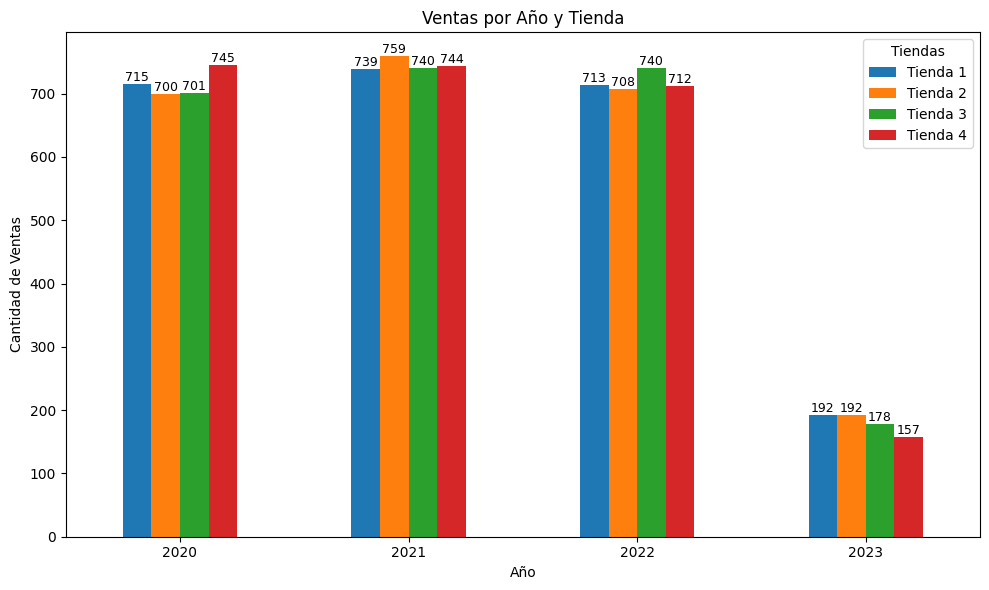

In [12]:
import matplotlib.pyplot as plt

tabla_sin_total = tabla_comparativa.drop(index='Total')

ventas_fig, ventas_ax = plt.subplots(figsize=(10, 6))

tabla_sin_total.plot(kind='bar', ax=ventas_ax)

ventas_ax.set_title('Ventas por Año y Tienda')
ventas_ax.set_xlabel('Año')
ventas_ax.set_ylabel('Cantidad de Ventas')
ventas_ax.tick_params(axis='x', rotation=0)
ventas_ax.legend(title='Tiendas')

for container in ventas_ax.containers:
    ventas_ax.bar_label(container, label_type='edge', fontsize=9)

ventas_fig.tight_layout()
ventas_fig.show()


#1. Análisis de facturación



In [5]:
def generar_facturacion(tiendas):
    facturacion = pd.DataFrame({
        "Tienda": [f"tienda{i+1}" for i in range(len(tiendas))],
        "Suma Precio": [df["Precio"].sum() for df in tiendas]
    })

    facturacion = facturacion.sort_values(by="Suma Precio", ascending=False)
    facturacion["Suma Precio"] = facturacion["Suma Precio"].apply(lambda x: "{:,.0f}".format(x))
    return facturacion

tiendas = [tienda, tienda2, tienda3, tienda4]

facturacion_total = generar_facturacion(tiendas)
print(facturacion_total)

    Tienda    Suma Precio
0  tienda1  1,150,880,400
1  tienda2  1,116,343,500
2  tienda3  1,098,019,600
3  tienda4  1,038,375,700


Al analizar y comparar las ventas totales utilizando la columna Precio, observamos que la Tienda 1 fue la que obtuvo la mayor facturación, seguida por la Tienda 2, la Tienda 3 y, finalmente, la Tienda 4. Este resultado es consistente con el análisis exploratorio realizado al inicio.

In [23]:
def generar_facturacion_por_anio(tiendas):
    facturacion = []

    for i, df in enumerate(tiendas):
        df["Fecha de Compra"] = pd.to_datetime(df["Fecha de Compra"], dayfirst=True, errors='coerce')
        df["Año"] = df["Fecha de Compra"].dt.year

        df_facturacion = df.groupby("Año")["Precio"].sum().reset_index()
        df_facturacion["Tienda"] = f"tienda{i+1}"
        facturacion.append(df_facturacion)


    facturacion = pd.concat(facturacion, ignore_index=True)
    facturacion = facturacion[["Tienda", "Año", "Precio"]]
    facturacion = facturacion.sort_values(by=["Año", "Precio"], ascending=[True, False])
    facturacion["Precio"] = facturacion["Precio"].apply(lambda x: "{:,.0f}".format(x))

    return facturacion

tiendas = [tienda, tienda2, tienda3, tienda4]
facturacion_total = generar_facturacion_por_anio(tiendas)
print(facturacion_total.to_string(index=False))

 Tienda  Año      Precio
tienda1 2020 368,933,200
tienda4 2020 330,847,700
tienda3 2020 321,707,500
tienda2 2020 320,466,600
tienda3 2021 362,954,400
tienda1 2021 362,120,800
tienda2 2021 351,215,500
tienda4 2021 347,823,600
tienda2 2022 358,226,500
tienda3 2022 350,438,300
tienda1 2022 316,565,600
tienda4 2022 302,221,500
tienda1 2023 103,260,800
tienda2 2023  86,434,900
tienda3 2023  62,919,400
tienda4 2023  57,482,900


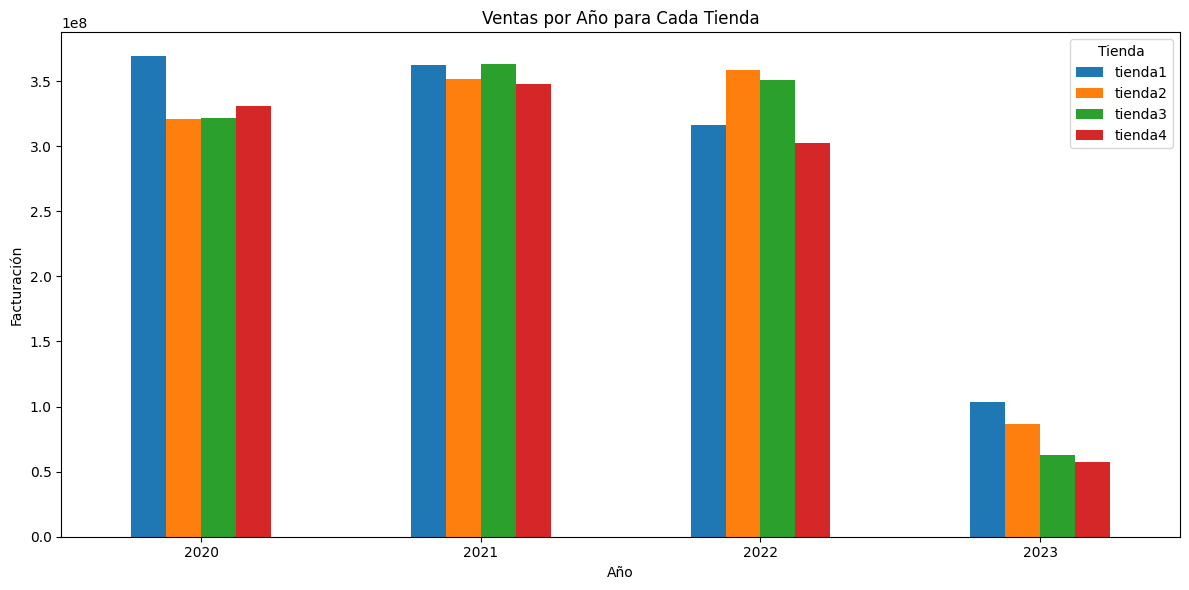

In [30]:
import matplotlib.pyplot as plt
import pandas as pd


facturacion_total["Precio"] = facturacion_total["Precio"].astype(str).str.replace(",", "").astype(float)
pivot = facturacion_total.pivot(index="Año", columns="Tienda", values="Precio")


facturizacion_fig, facturizacion_plt = plt.subplots(figsize=(12, 6))

pivot.plot(kind="bar", ax=facturizacion_plt)
facturizacion_plt.set_title("Ventas por Año para Cada Tienda")
facturizacion_plt.set_xlabel("Año")
facturizacion_plt.set_ylabel("Facturación")
facturizacion_plt.tick_params(axis='x', rotation=0)
facturizacion_plt.legend(title="Tienda")

facturizacion_fig.tight_layout()
facturizacion_fig.show()

# 2. Ventas por categoría

In [ ]:
ventas_tienda = tienda["Categoría del Producto"].value_counts()
ventas_tienda

,count
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


Podríamos hacer una analisis similar al anterior para cada una de las  tiendas, pero tambien podemos generar un Dataframe para comparar directamente las 4 tiendas. ⬇️

In [ ]:
ventas_comparadas = pd.DataFrame({
    "tienda": tienda["Categoría del Producto"].value_counts(),
    "tienda2": tienda2["Categoría del Producto"].value_counts(),
    "tienda3": tienda3["Categoría del Producto"].value_counts(),
    "tienda4": tienda4["Categoría del Producto"].value_counts()
})

ventas_comparadas["Total"] = ventas_comparadas.sum(axis=1)
ventas_comparadas = ventas_comparadas.sort_values(by="Total", ascending=False)

print(ventas_comparadas)

                         tienda  tienda2  tienda3  tienda4  Total
Categoría del Producto                                           
Muebles                     465      442      499      480   1886
Electrónicos                448      422      451      451   1772
Juguetes                    324      313      315      338   1290
Electrodomésticos           312      305      278      254   1149
Deportes y diversión        284      275      277      277   1113
Instrumentos musicales      182      224      177      170    753
Libros                      173      197      185      187    742
Artículos para el hogar     171      181      177      201    730


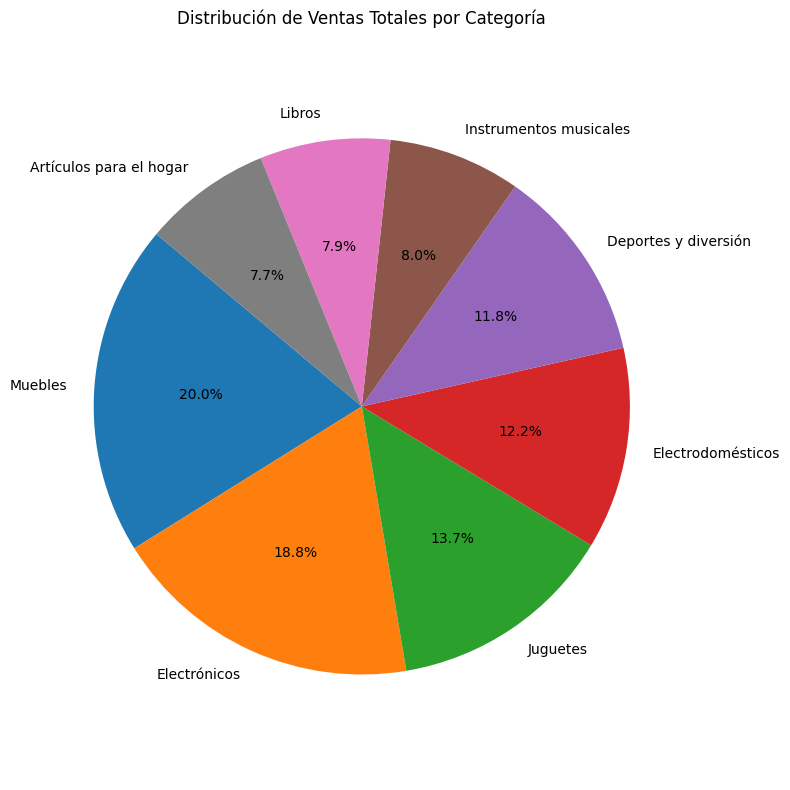

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(
    ventas_comparadas["Total"],
    labels=ventas_comparadas.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title("Distribución de Ventas Totales por Categoría")
plt.tight_layout()
plt.show()


Obsevamos que en su totalidad, *Muebles* es la categoría con mayores ventas, mientras que *Artículos para el hogar*, la menos popular.

# 3. Calificación promedio de la tienda


In [ ]:
calificaciones = []

for i, df in enumerate(tiendas):
    promedio = df["Calificación"].mean().round(2)
    calificaciones.append({
        "Tienda": f"tienda{i+1}",
        "Calificación Promedio": promedio
    })

calificaciones_df = pd.DataFrame(calificaciones)
calificaciones_df = calificaciones_df.sort_values(by="Calificación Promedio", ascending=False)

display(calificaciones_df)

,Tienda,Calificación Promedio
2,tienda3,4.05
1,tienda2,4.04
3,tienda4,4.00
0,tienda1,3.98


In [ ]:
def generar_calificacion_por_anio_ordenada(tiendas):
    calificacion_por_anio = []

    for i, df in enumerate(tiendas):
        df["Fecha de Compra"] = pd.to_datetime(df["Fecha de Compra"], dayfirst=True, errors='coerce')
        df["Año"] = df["Fecha de Compra"].dt.year

        calificacion_por_anio_df = df.groupby("Año")["Calificación"].mean().round(2).reset_index()
        calificacion_por_anio_df["Tienda"] = f"tienda{i+1}"

        calificacion_por_anio.append(calificacion_por_anio_df)

    calificacion_total = pd.concat(calificacion_por_anio, ignore_index=True)

    calificacion_total = calificacion_total.sort_values(by=["Año", "Calificación"], ascending=[True, False])

    calificacion_total = calificacion_total[["Tienda", "Año", "Calificación"]]

    return calificacion_total

tiendas = [tienda, tienda2, tienda3, tienda4]
calificacion_total = generar_calificacion_por_anio_ordenada(tiendas)

display(calificacion_total)

,Tienda,Año,Calificación
8,tienda3,2020,4.12
4,tienda2,2020,4.04
12,tienda4,2020,4.02
0,tienda1,2020,3.93
5,tienda2,2021,4.00
1,tienda1,2021,3.96
13,tienda4,2021,3.96
9,tienda3,2021,3.93
6,tienda2,2022,4.10
10,tienda3,2022,4.09


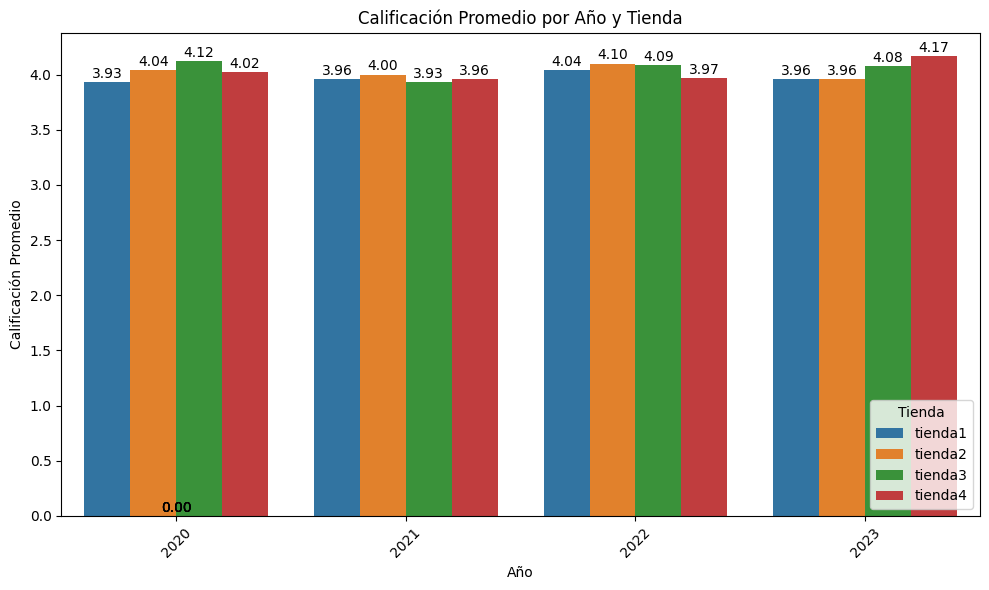

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

orden_tiendas = ["tienda1", "tienda2", "tienda3", "tienda4"]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Año', y='Calificación', hue='Tienda', data=calificacion_total, hue_order=orden_tiendas)

for p in ax.patches:
    height = p.get_height()
    if height is not None:
        ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
                f'{height:.2f}',
                ha='center', va='bottom')

plt.title('Calificación Promedio por Año y Tienda')
plt.xlabel('Año')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
ventas_tienda0 = tienda['Categoría del Producto'].value_counts().rename_axis('Categoría del Producto').reset_index(name='Ventas Tienda')
ventas_tienda1 = tienda2['Categoría del Producto'].value_counts().rename_axis('Categoría del Producto').reset_index(name='Ventas Tienda1')
ventas_tienda2 = tienda3['Categoría del Producto'].value_counts().rename_axis('Categoría del Producto').reset_index(name='Ventas Tienda2')
ventas_tienda3 = tienda4['Categoría del Producto'].value_counts().rename_axis('Categoría del Producto').reset_index(name='Ventas Tienda3')

comparativa = pd.merge(ventas_tienda0, ventas_tienda1, on='Categoría del Producto', how='outer')
comparativa = pd.merge(comparativa, ventas_tienda2, on='Categoría del Producto', how='outer')
comparativa = pd.merge(comparativa, ventas_tienda3, on='Categoría del Producto', how='outer')

comparativa.fillna(0, inplace=True)
comparativa.iloc[:, 1:] = comparativa.iloc[:, 1:].astype(int)

comparativa.sort_values(by='Ventas Tienda', ascending=False, inplace=True)

display(comparativa)


,Categoría del Producto,Ventas Tienda,Ventas Tienda1,Ventas Tienda2,Ventas Tienda3
7,Muebles,465,442,499,480
3,Electrónicos,448,422,451,451
5,Juguetes,324,313,315,338
2,Electrodomésticos,312,305,278,254
1,Deportes y diversión,284,275,277,277
4,Instrumentos musicales,182,224,177,170
6,Libros,173,197,185,187
0,Artículos para el hogar,171,181,177,201


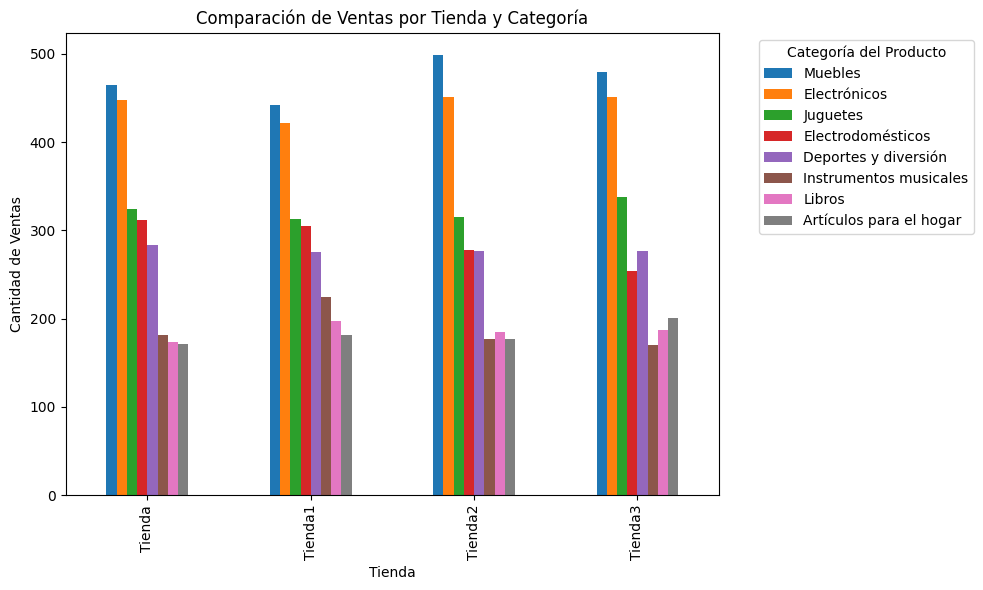

In [ ]:
import matplotlib.pyplot as plt

df_plot = comparativa.set_index('Categoría del Producto').T
df_plot.index = ['Tienda', 'Tienda1', 'Tienda2', 'Tienda3']

ax = df_plot.plot(kind='bar', figsize=(10, 6))

ax.set_xlabel('Tienda')
ax.set_ylabel('Cantidad de Ventas')
ax.set_title('Comparación de Ventas por Tienda y Categoría')
ax.legend(title='Categoría del Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [6]:
costos_promedios = []

for i, df in enumerate(tiendas):
    promedio = df["Costo de envío"].mean().round(2)
    costos_promedios.append({
        "Tienda": f"tienda{i+1}",
        "Costo de envío": promedio
    })

costos_promedios_df = pd.DataFrame(costos_promedios)
costos_promedios_df = costos_promedios_df.sort_values(by="Costo de envío", ascending=False)

display(costos_promedios_df)

,Tienda,Costo de envío
0,tienda1,26018.61
1,tienda2,25216.24
2,tienda3,24805.68
3,tienda4,23459.46


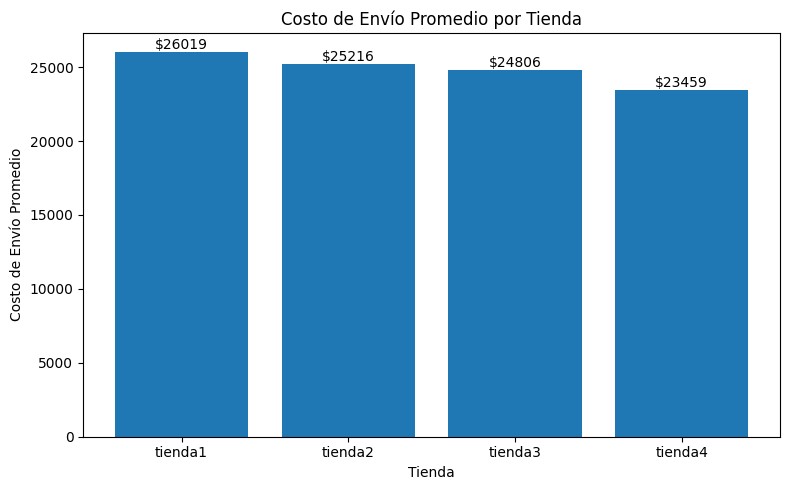

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(costos_promedios_df["Tienda"], costos_promedios_df["Costo de envío"])

plt.xlabel("Tienda")
plt.ylabel("Costo de Envío Promedio")
plt.title("Costo de Envío Promedio por Tienda")

for i, valor in enumerate(costos_promedios_df["Costo de envío"]):
    plt.text(i, valor, f"${valor:.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# Introducción

Tomar decisiones estratégicas dentro de un negocio no es una tarea sencilla. A menudo, se deben considerar múltiples factores, los cuales pueden ser fácilmente pasados por alto o subestimados si no se analizan con el debido rigor. En este contexto, el análisis de datos se convierte en una herramienta clave para respaldar decisiones informadas y objetivas.

El presente informe tiene como objetivo asesorar al señor Juan, propietario de cuatro tiendas, quien enfrenta el desafío de vender una de ellas. Para brindarle una recomendación fundamentada, se ha llevado a cabo un análisis detallado considerando los siguientes aspectos clave:


* Ingresos totales de las tiendas.

* Categorías de productos más y menos vendidas.

* Calificaciones promedio de los clientes por tienda.

* Productos más y menos vendidos.

* El coste de envío promedio para cada tienda.

A lo largo de este documento, se presentarán los principales hallazgos asociados a cada uno de estos factores, apoyados con visualizaciones que permiten una mejor interpretación de los datos. Finalmente, se integrarán todos los elementos analizados para recomendar cuál de las tiendas debería ser vendida, considerando tanto sus fortalezas como debilidades en relación con las demás.

El análisis fue desarrollado en Python, utilizando las librerías Pandas y Matplotlib, ampliamente utilizadas en el ámbito de la ciencia de datos por su eficacia en el procesamiento, análisis y visualización de información.

# Análisis
A continuación se presenta el análisis de los ingresos generados por cada tienda. Cabe señalar que esta sección se enfoca exclusivamente en la interpretación de los datos y visualizaciones; el desarrollo del código correspondiente se encuentra detallado al inicio del Jupyter Notebook.


## 1.   Ingresos totales de las tiendas





In [6]:
display(facturacion_total)

,Tienda,Suma Precio
0,tienda1,"1,150,880,400"
1,tienda2,"1,116,343,500"
2,tienda3,"1,098,019,600"
3,tienda4,"1,038,375,700"


Al observar la facturación total acumulada, la Tienda 1 se posiciona como la más rentable, superando al resto por un margen considerable. Le siguen, en orden decreciente, la Tienda 2, la Tienda 3, y en último lugar, la Tienda 4.

 Tienda  Año      Precio
tienda1 2020 368933200.0
tienda4 2020 330847700.0
tienda3 2020 321707500.0
tienda2 2020 320466600.0
tienda3 2021 362954400.0
tienda1 2021 362120800.0
tienda2 2021 351215500.0
tienda4 2021 347823600.0
tienda2 2022 358226500.0
tienda3 2022 350438300.0
tienda1 2022 316565600.0
tienda4 2022 302221500.0
tienda1 2023 103260800.0
tienda2 2023  86434900.0
tienda3 2023  62919400.0
tienda4 2023  57482900.0


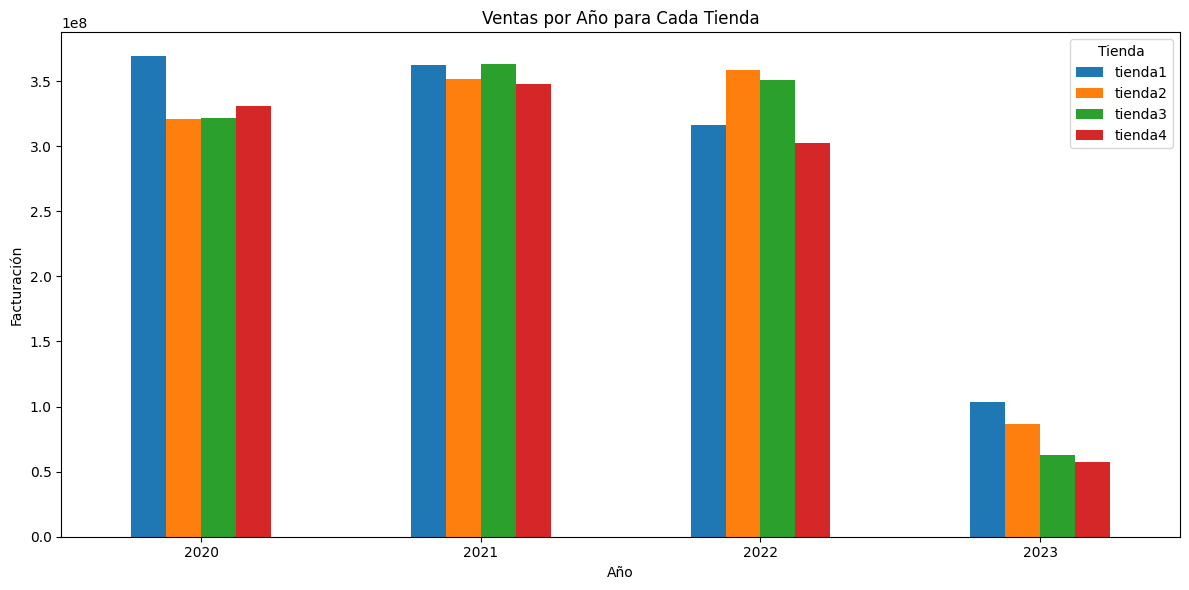

In [31]:
print(facturacion_total.to_string(index=False))
facturizacion_fig


Cuando se desagregan los datos por año, se identifican patrones más específicos. Aunque Tienda 4 tuvo un desempeño relativamente bueno en 2020, en los tres años siguientes su facturación fue consistentemente la más baja entre todas las tiendas. Esto indica una tendencia descendente sostenida, lo que podría reflejar problemas de competitividad, disminución en la demanda, o ineficiencias operativas.

En contraste, Tienda 1 mantuvo un desempeño sólido entre 2020 y 2022, aunque también presenta una caída notable en 2023. A pesar de ello, su acumulado general sigue siendo el más alto.

**💡 Conclusión parcial:** Aunque todas las tiendas muestran una disminución de ingresos en 2023 —posiblemente por factores externos al negocio—, Tienda 4 destaca negativamente por su bajo rendimiento constante en los últimos tres años, lo que podría ser un indicio de que es la opción menos favorable para mantener a futuro.